In [ ]:
import torch
import numpy as np

print("PyTorch Version:", torch.__version__)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

PyTorch Version: 2.6.0+cu124


# **1.1 Task**

In [ ]:
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

x = torch.Tensor(X)
y = torch.Tensor(Y)

x = x.to(device)
y = y.to(device)

# Compute Gaussian
z = torch.exp(-(x**2+y**2)/2.0)



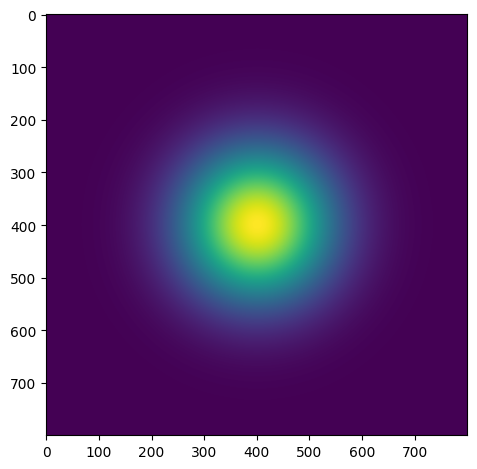

3

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(z.cpu().numpy())#Updated!
plt.tight_layout()
plt.show()
3

# **1.2 AI Task**

**Numpy and Matplotlib**

Prompt: Generate a Python script to plot a 2D Gaussian function using Numpy and Matplotlib

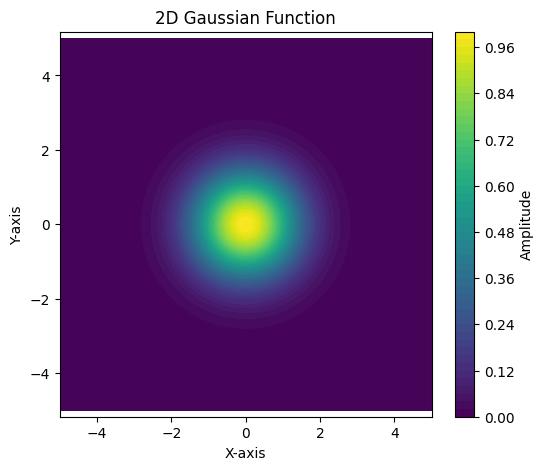

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 2D Gaussian function
def gaussian_2d(x, y, mu_x, mu_y, sigma_x, sigma_y):
    return np.exp(-(((x - mu_x)**2) / (2 * sigma_x**2) +
                    ((y - mu_y)**2) / (2 * sigma_y**2)))

# Grid settings
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)

# Gaussian parameters
mu_x, mu_y = 0, 0       # Mean
sigma_x, sigma_y = 1, 1 # Standard deviations

# Compute Gaussian values
Z = gaussian_2d(X, Y, mu_x, mu_y, sigma_x, sigma_y)

# Plot
plt.figure(figsize=(6, 5))
contour = plt.contourf(X, Y, Z, levels=50, cmap="viridis")
plt.colorbar(contour, label="Amplitude")
plt.title("2D Gaussian Function")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axis("equal")
plt.show()


**PyTorch and Tensors**

Prompt: Now convert the python script using Pytorch and to use it tensors instead of numpy

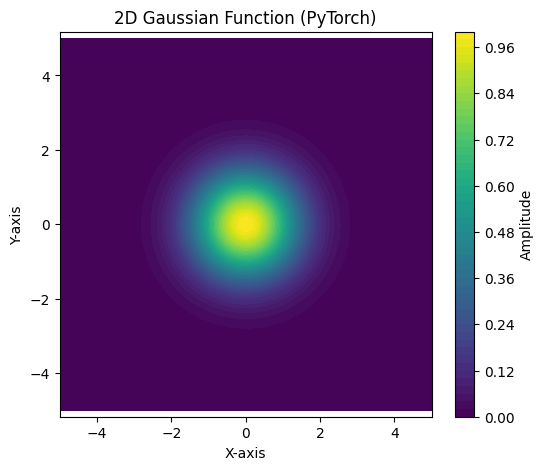

In [ ]:
import torch
import matplotlib.pyplot as plt

# 2D Gaussian function (PyTorch)
def gaussian_2d(x, y, mu_x, mu_y, sigma_x, sigma_y):
    return torch.exp(-(((x - mu_x) ** 2) / (2 * sigma_x ** 2) +
                       ((y - mu_y) ** 2) / (2 * sigma_y ** 2)))

# Grid settings
x = torch.linspace(-5, 5, 200)
y = torch.linspace(-5, 5, 200)
X, Y = torch.meshgrid(x, y, indexing="xy")

# Gaussian parameters
mu_x, mu_y = 0.0, 0.0       # Mean
sigma_x, sigma_y = 1.0, 1.0 # Standard deviations

# Compute Gaussian values
Z = gaussian_2d(X, Y, mu_x, mu_y, sigma_x, sigma_y)

# Convert tensors to numpy for plotting
X_np = X.numpy()
Y_np = Y.numpy()
Z_np = Z.numpy()

# Plot
plt.figure(figsize=(6, 5))
contour = plt.contourf(X_np, Y_np, Z_np, levels=50, cmap="viridis")
plt.colorbar(contour, label="Amplitude")
plt.title("2D Gaussian Function (PyTorch)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axis("equal")
plt.show()


# **1.3 Demonstration**

Prompt: use similar code to create a 2D sine func- tion (i.e. a sune function from PyTorch whose angle is dependent on x and y coordinates of the pixels) and another plot of the resulting Tensor that shows the ‘stripes’ of this function.

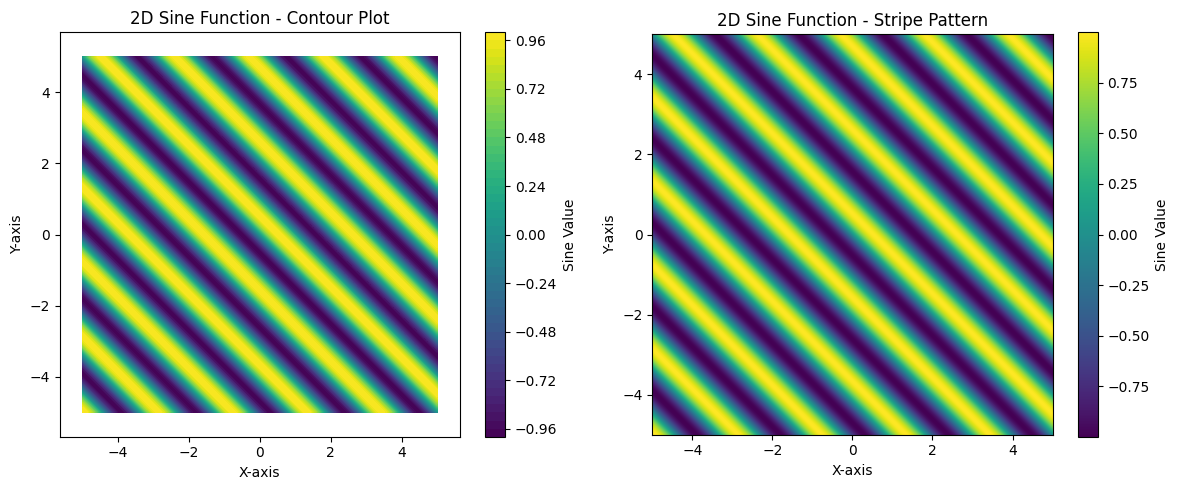

In [ ]:
import torch
import matplotlib.pyplot as plt

# 2D sine function (PyTorch)
def sine_2d(x, y, freq_x=1.0, freq_y=1.0):
    """
    Creates a 2D sine function based on the pixel coordinates.
    freq_x, freq_y control the number of stripes along X and Y axes.
    """
    angle = freq_x * x + freq_y * y
    return torch.sin(angle)

# Grid settings
x = torch.linspace(-5, 5, 400)  # More points for smoother stripes
y = torch.linspace(-5, 5, 400)
X, Y = torch.meshgrid(x, y, indexing="xy")

# Frequency parameters for the stripes
freq_x, freq_y = 3.0, 3.0  # Try changing these values to rotate/scale stripes

# Compute sine values
Z = sine_2d(X, Y, freq_x, freq_y)

# Convert to NumPy for plotting
X_np = X.numpy()
Y_np = Y.numpy()
Z_np = Z.numpy()

# Create figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Contour plot
contour = axs[0].contourf(X_np, Y_np, Z_np, levels=50, cmap="viridis")
fig.colorbar(contour, ax=axs[0], label="Sine Value")
axs[0].set_title("2D Sine Function - Contour Plot")
axs[0].set_xlabel("X-axis")
axs[0].set_ylabel("Y-axis")
axs[0].axis("equal")

# Stripe pattern (imshow)
im = axs[1].imshow(Z_np, extent=(-5, 5, -5, 5), origin="lower", cmap="viridis", aspect="equal")
fig.colorbar(im, ax=axs[1], label="Sine Value")
axs[1].set_title("2D Sine Function - Stripe Pattern")
axs[1].set_xlabel("X-axis")
axs[1].set_ylabel("Y-axis")

plt.tight_layout()
plt.show()


Prompt: multiply both the Gaussian and the sine/cosine function together and visualise it

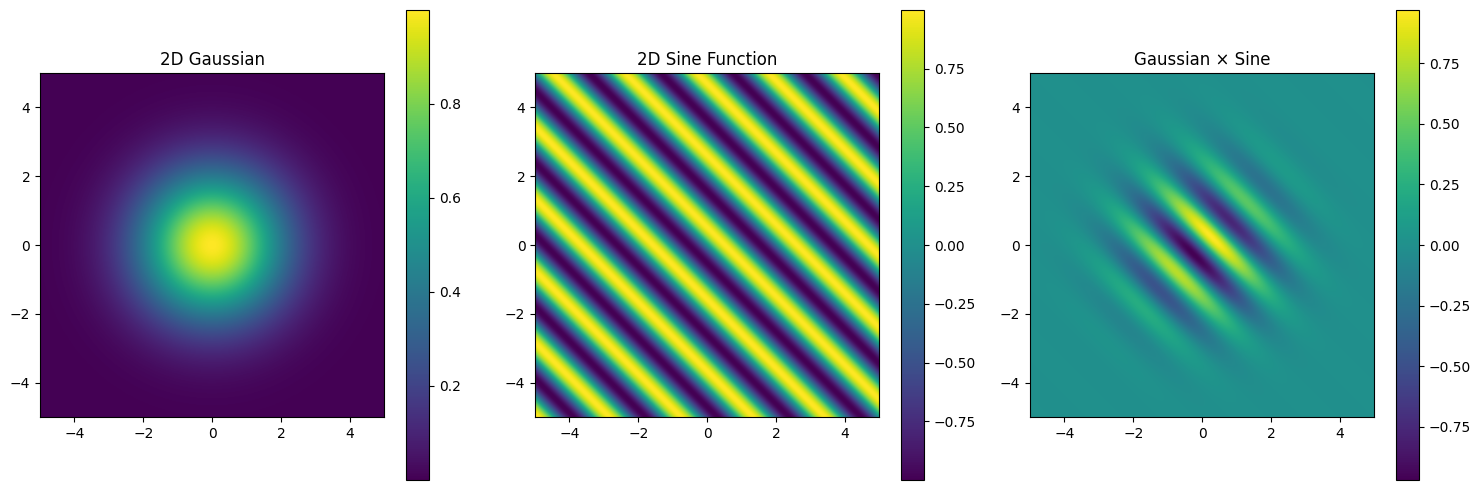

In [ ]:
import torch
import matplotlib.pyplot as plt

# --- Gaussian function ---
def gaussian_2d(x, y, mu_x, mu_y, sigma_x, sigma_y):
    return torch.exp(-(((x - mu_x) ** 2) / (2 * sigma_x ** 2) +
                       ((y - mu_y) ** 2) / (2 * sigma_y ** 2)))

# --- Sine function ---
def sine_2d(x, y, freq_x=1.0, freq_y=1.0):
    angle = freq_x * x + freq_y * y
    return torch.sin(angle)

# Grid
x = torch.linspace(-5, 5, 400)
y = torch.linspace(-5, 5, 400)
X, Y = torch.meshgrid(x, y, indexing="xy")

# Gaussian parameters
mu_x, mu_y = 0.0, 0.0
sigma_x, sigma_y = 1.5, 1.5

# Sine parameters
freq_x, freq_y = 3.0, 3.0

# Compute functions
Z_gaussian = gaussian_2d(X, Y, mu_x, mu_y, sigma_x, sigma_y)
Z_sine = sine_2d(X, Y, freq_x, freq_y)

# Multiply both (modulated sine pattern)
Z_combined = Z_gaussian * Z_sine

# Convert to NumPy for plotting
Z_g_np = Z_gaussian.numpy()
Z_s_np = Z_sine.numpy()
Z_c_np = Z_combined.numpy()

# Plot all three
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gaussian
im0 = axs[0].imshow(Z_g_np, extent=(-5, 5, -5, 5), origin="lower", cmap="viridis")
axs[0].set_title("2D Gaussian")
fig.colorbar(im0, ax=axs[0])

# Sine
im1 = axs[1].imshow(Z_s_np, extent=(-5, 5, -5, 5), origin="lower", cmap="viridis")
axs[1].set_title("2D Sine Function")
fig.colorbar(im1, ax=axs[1])

# Combined
im2 = axs[2].imshow(Z_c_np, extent=(-5, 5, -5, 5), origin="lower", cmap="viridis")
axs[2].set_title("Gaussian × Sine")
fig.colorbar(im2, ax=axs[2])

plt.tight_layout()
plt.show()


When I multiply a 2D Gaussian with a sine function and visualize it, I get a Gabor function. The Gaussian acts as an envelope, localizing the pattern in space so it fades smoothly toward the edges. The sine provides the oscillatory pattern — the “stripes” or waves. The multiplication means that the stripes are strongest at the center (where the Gaussian is highest) and diminish gradually to zero outward.
In this plot:

*   The middle image is the infinite sine stripes pattern.
*   The right image is the Gaussian × sine, where the stripes exist only in the
*   center and fade out — creating a “windowed” wave pattern.

This is exactly the mathematical basis of a Gabor filter, often used in computer vision for edge detection, texture analysis, and pattern recognition.

# **2.1 Task**

In [1]:
import torch
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

#Mandelbrot Set
for i in range(200):
  #Compute the new values of z: z^2 + x
  zs_ = zs*zs + z
  #Have we diverged with this new value?
  not_diverged = torch.abs(zs_) < 4.0
  #Update variables to compute
  ns += not_diverged
  zs = zs_

/tmp/ipython-input-45590559.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


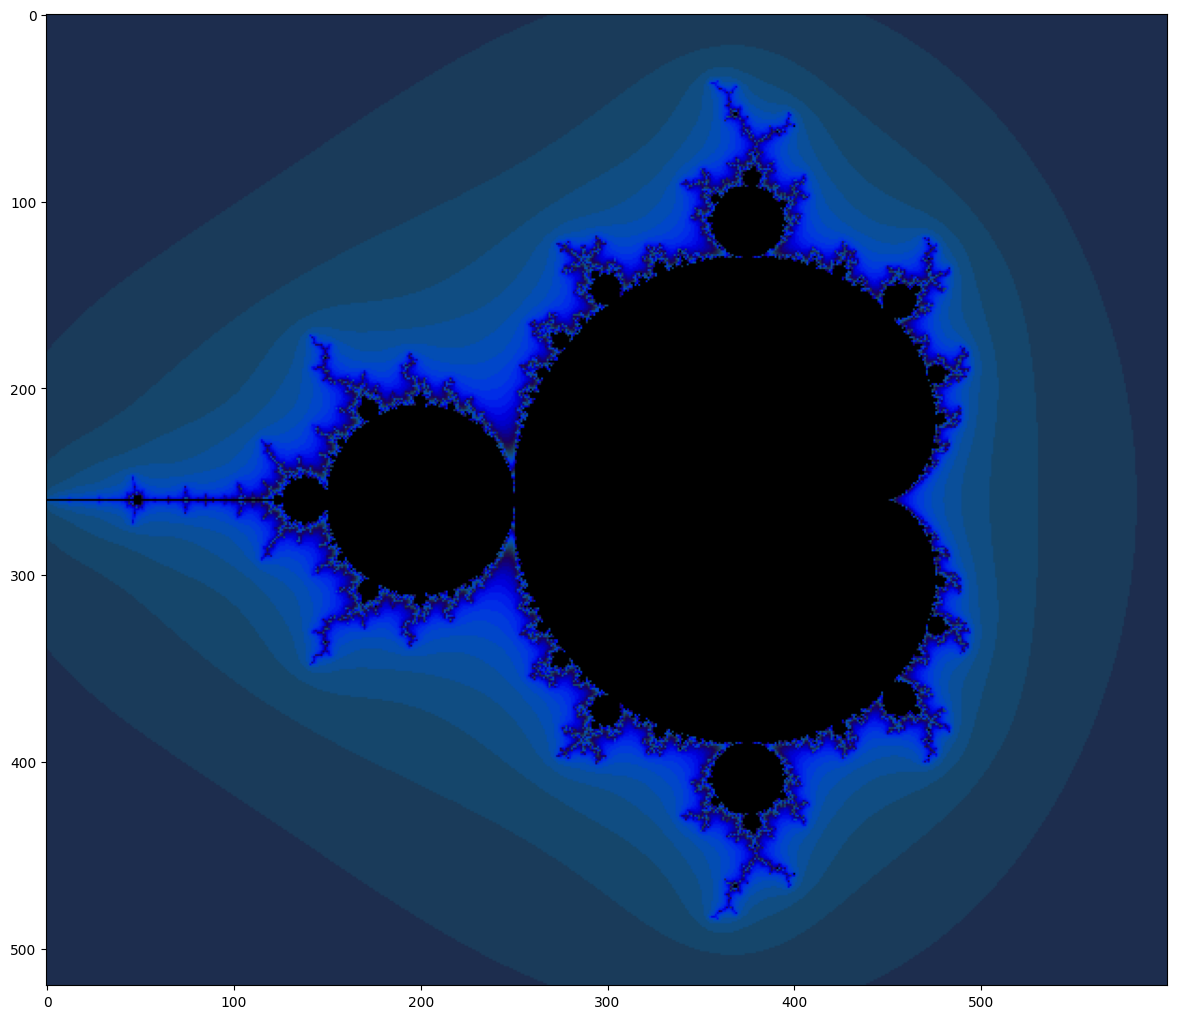

In [2]:
#plot
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,10))

def processFractal(a):
  """Display an array of iteration counts as a
  colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
  30+50*np.sin(a_cyclic),
  155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

# **2.2 AI Tasks**

Prompt: create a python script to generate a Mandelbrot set implemented in PyTorch and that runs  on the GPU (i.e. seems to run fast and allows fast rendering)

There is no issue for this prompt as it's give a great code with comphrehensive details

Using device: cuda


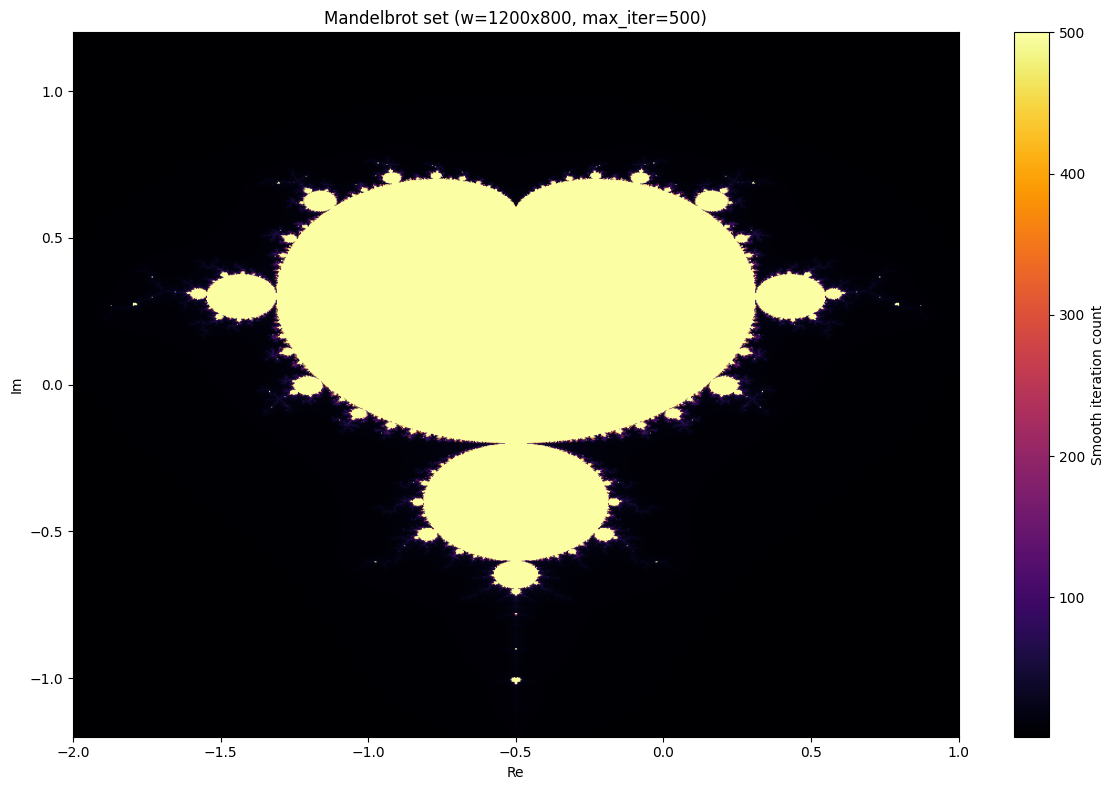

In [14]:
import math
import torch
import matplotlib.pyplot as plt

def mandelbrot_torch(xmin=-2.0, xmax=1.0, ymin=-1.5, ymax=1.5,
                     width=1024, height=1024, max_iter=200,
                     device=None):
    """
    Compute Mandelbrot set escape times using PyTorch (GPU if available).

    Returns:
      - img: 2D float32 tensor (height x width) with smooth iteration counts.
      - extent: tuple for matplotlib imshow: (xmin, xmax, ymin, ymax)
    """
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    dtype = torch.float32

    # Create grid of complex points (c = x + i*y)
    re = torch.linspace(xmin, xmax, width, device=device, dtype=dtype)
    im = torch.linspace(ymin, ymax, height, device=device, dtype=dtype)
    c_re, c_im = torch.meshgrid(re, im, indexing="xy")  # shapes: (width, height)
    # transpose to (height, width)
    c_re = c_re.t()
    c_im = c_im.t()

    # Initialize z = 0
    z_re = torch.zeros_like(c_re, device=device)
    z_im = torch.zeros_like(c_im, device=device)

    # Masks and storage for escape information
    alive = torch.ones_like(c_re, dtype=torch.bool, device=device)  # still iterating
    escape_iter = torch.full_like(c_re, float(max_iter), dtype=dtype, device=device)  # default = max_iter
    escape_mag2 = torch.full_like(c_re, float('inf'), dtype=dtype, device=device)

    # Iteration loop (vectorized)
    for i in range(max_iter):
        # compute z^2: (a+ib)^2 = a^2 - b^2 + i*2ab
        z_re2 = z_re * z_re
        z_im2 = z_im * z_im
        z_re_im = z_re * z_im

        # update z where alive
        new_re = z_re2 - z_im2 + c_re
        new_im = 2.0 * z_re_im + c_im

        z_re = torch.where(alive, new_re, z_re)
        z_im = torch.where(alive, new_im, z_im)

        # magnitude squared
        mag2 = z_re * z_re + z_im * z_im

        # find newly escaped
        escaped_now = alive & (mag2 > 4.0)
        if escaped_now.any():
            # store iteration and magnitude^2 for smooth coloring
            escape_iter[escaped_now] = float(i)
            escape_mag2[escaped_now] = mag2[escaped_now]

        # update alive mask
        alive = alive & (mag2 <= 4.0)

        # small optimization: break early if all escaped
        if not alive.any():
            break

    # Smooth coloring:
    # For points that escaped, compute continuous iteration count:
    # nu = n + 1 - log(log(|z|))/log(2)  (using escape_mag2 saved)
    # For points that never escaped, leave at max_iter (or set to 0 to mark inside set)
    eps = 1e-12
    # make a copy to keep original if needed
    smooth = escape_iter.clone()
    escaped_mask = escape_mag2 != float('inf')
    if escaped_mask.any():
        mag = torch.sqrt(escape_mag2[escaped_mask].clamp(min=eps))
        nu = escape_iter[escaped_mask] + 1 - torch.log(torch.log(mag)) / math.log(2.0)
        smooth[escaped_mask] = nu

    # Optionally make interior points equal to max_iter (already set), or set to 0
    # smooth[~escaped_mask] = 0.0

    # Move to CPU for plotting (as numpy)
    img = smooth.to("cpu")

    return img, (xmin, xmax, ymin, ymax)


if __name__ == "__main__":
    # Parameters
    width, height = 1200, 800  # resolution
    max_iter = 500
    # region to render (try different centers/zoom)
    xmin, xmax = -2.0, 1.0
    ymin, ymax = -1.2, 1.2

    # choose device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Using device:", device)

    # Compute Mandelbrot
    img, extent = mandelbrot_torch(xmin, xmax, ymin, ymax,
                                   width=width, height=height,
                                   max_iter=max_iter, device=device)

    # Normalize image for nice colormapping
    # Clip values and scale to [0, 1]
    img_np = img.numpy()
    # Mask interior points (didn't escape) for coloring — optional:
    inside_mask = img_np >= float(max_iter - 1e-6)  # those that didn't escape
    # For plotting, set interior to max value (so they appear dark in many colormaps)
    img_plot = img_np.copy()
    img_plot[inside_mask] = img_plot.max()

    # Display
    plt.figure(figsize=(12, 8))
    plt.imshow(img_plot, extent=extent, origin="lower", cmap="inferno", aspect="auto")
    plt.title(f"Mandelbrot set (w={width}x{height}, max_iter={max_iter})")
    plt.xlabel("Re")
    plt.ylabel("Im")
    plt.colorbar(label="Smooth iteration count")
    plt.tight_layout()
    plt.show()


# **2.3 Demonstration**

Prompt: create a python script to generate a Mandelbrot set implemented in PyTorch and that runs  on the GPU (i.e. seems to run fast and allows fast rendering)

Using device: cuda
Region: x[-0.746443887037151, -0.740843887037151], y[0.13002590420533, 0.13362590420533], step=6e-06, max_iter=1200


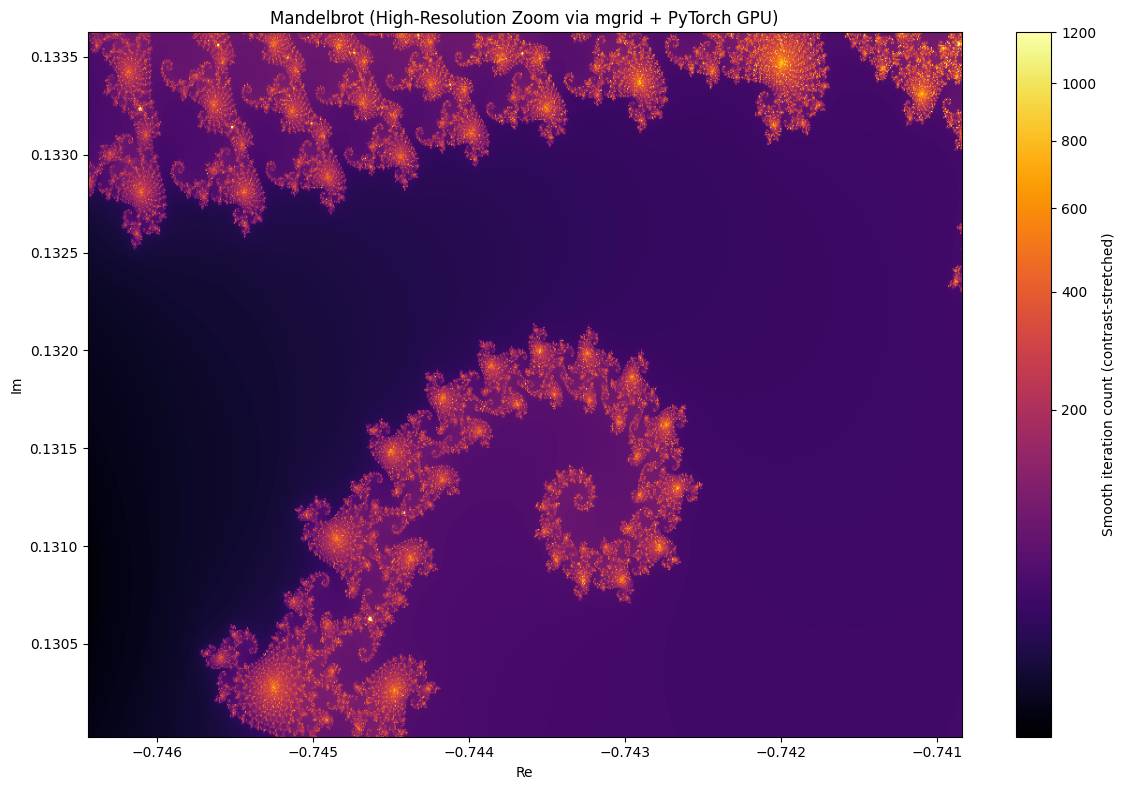

In [15]:
# mandelbrot_hr.py
import math
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib import colors

def mandelbrot_torch_from_mgrid(xmin, xmax, ymin, ymax,
                                step=1e-5,         # smaller step => higher resolution (and more compute)
                                max_iter=800,      # increase for deeper zooms (slower)
                                device=None):
    """
    High-resolution Mandelbrot using np.mgrid (fixed step) for the grid
    and PyTorch (GPU if available) for fast computation.
    Returns (img_cpu, extent, inside_mask) where img_cpu is a CPU tensor.
    """
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # --- Build high-res grid with fixed spacing using np.mgrid ---
    # mgrid returns arrays with shape (Ny, Nx)
    Y_np, X_np = np.mgrid[ymin:ymax:step, xmin:xmax:step]
    # Convert to torch (float32) on requested device
    X = torch.from_numpy(X_np.astype(np.float32)).to(device)
    Y = torch.from_numpy(Y_np.astype(np.float32)).to(device)

    # Complex plane: c = X + iY
    c_re, c_im = X, Y

    # Initialize z = 0
    z_re = torch.zeros_like(c_re)
    z_im = torch.zeros_like(c_im)

    # Track which points are still inside (alive), escape iters and magnitudes
    alive = torch.ones_like(c_re, dtype=torch.bool)
    escape_iter = torch.full_like(c_re, float(max_iter))
    escape_mag2 = torch.full_like(c_re, float('inf'))

    # Vectorized iteration
    for i in range(max_iter):
        # z^2 + c
        z_re2 = z_re * z_re
        z_im2 = z_im * z_im
        z_re_im = z_re * z_im

        new_re = z_re2 - z_im2 + c_re
        new_im = 2.0 * z_re_im + c_im

        z_re = torch.where(alive, new_re, z_re)
        z_im = torch.where(alive, new_im, z_im)

        mag2 = z_re * z_re + z_im * z_im

        escaped_now = alive & (mag2 > 4.0)
        if escaped_now.any():
            escape_iter[escaped_now] = float(i)
            escape_mag2[escaped_now] = mag2[escaped_now]

        alive = alive & (mag2 <= 4.0)
        if not alive.any():
            break

    # Smooth coloring (continuous iteration count)
    eps = 1e-12
    smooth = escape_iter.clone()
    escaped_mask = escape_mag2 != float('inf')
    if escaped_mask.any():
        mag = torch.sqrt(escape_mag2[escaped_mask].clamp(min=eps))
        nu = escape_iter[escaped_mask] + 1 - torch.log(torch.log(mag)) / math.log(2.0)
        smooth[escaped_mask] = nu

    # Move to CPU for plotting
    img = smooth.to("cpu")
    inside_mask = (escape_mag2 == float('inf')).to("cpu")
    extent = (xmin, xmax, ymin, ymax)
    return img, extent, inside_mask


if __name__ == "__main__":
    # ---- ZOOM REGION (Seahorse Valley near -0.743643887 + 0.131825904i) ----
    # Pick a tight window for great detail without being too slow.
    # You can tweak these bounds and step to trade speed vs detail.
    center_x, center_y = -0.743643887037151, 0.13182590420533
    half_width_x = 0.0028    # ~0.0056 total width
    half_width_y = 0.0018    # keep aspect similar

    xmin = center_x - half_width_x
    xmax = center_x + half_width_x
    ymin = center_y - half_width_y
    ymax = center_y + half_width_y

    # A fixed step (mgrid style). Smaller => more pixels (slower, prettier).
    # With these bounds, step=2e-6 gives ~5600 x 3600 pixels (~20M), which is heavy.
    # step=6e-6 gives ~1867 x 1200 (~2.2M pixels): good balance for many GPUs/CPUs.
    step = 6e-6
    max_iter = 1200  # increase with deeper zooms

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Using device:", device)
    print(f"Region: x[{xmin}, {xmax}], y[{ymin}, {ymax}], step={step}, max_iter={max_iter}")

    # Compute
    img, extent, inside_mask = mandelbrot_torch_from_mgrid(
        xmin, xmax, ymin, ymax,
        step=step, max_iter=max_iter, device=device
    )

    # Convert to NumPy
    img_np = img.numpy()
    inside_np = inside_mask.numpy()

    # --- Contrast & interior coloring ---
    # 1) Power-law norm to boost contrast in darker areas
    norm = colors.PowerNorm(gamma=0.4)

    # 2) Make the interior a constant light color (e.g., white)
    # Replace interior with the max of the data range so it maps to the bright end
    img_plot = img_np.copy()
    img_plot[inside_np] = img_plot.max()

    # Show
    plt.figure(figsize=(12, 8))
    plt.imshow(img_plot, extent=extent, origin="lower",
               cmap="inferno", aspect="auto", norm=norm)
    plt.title("Mandelbrot (High-Resolution Zoom via mgrid + PyTorch GPU)")
    plt.xlabel("Re")
    plt.ylabel("Im")
    cbar = plt.colorbar()
    cbar.set_label("Smooth iteration count (contrast-stretched)")
    plt.tight_layout()
    plt.show()


Prompt: Now Modify the code so to show a Julia set rather than the Mandelbrot set.

Using device: cuda
Window: x[-1.6, 1.6] y[-1.2, 1.2] step=0.0015 max_iter=600  c=-0.8+0.156i


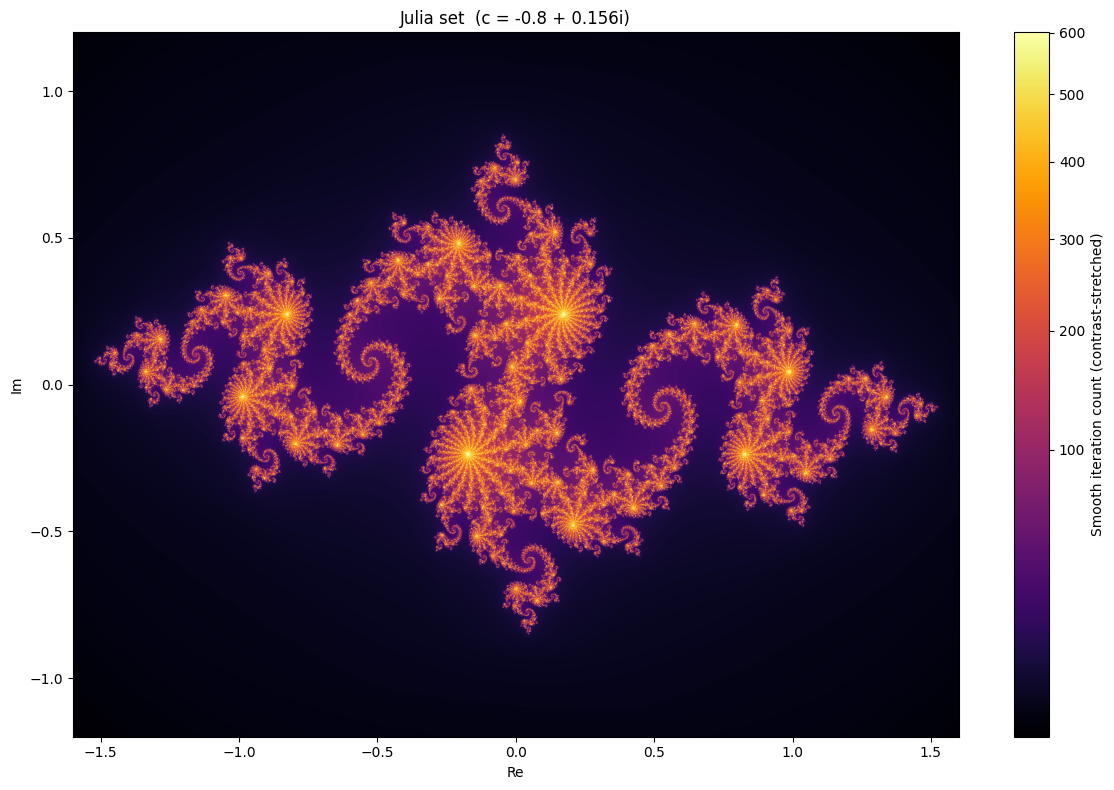

In [16]:
# julia_hr.py
import math
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib import colors

def julia_torch_from_mgrid(xmin, xmax, ymin, ymax,
                           step=0.0015,     # smaller step => higher resolution (slower)
                           max_iter=600,    # increase for more detail on deep zooms
                           c_re=-0.8, c_im=0.156,  # Julia constant c
                           device=None):
    """
    High-resolution Julia set using np.mgrid (fixed step) for the grid
    and PyTorch (GPU if available) for fast computation.

    Returns:
      img: 2D CPU tensor (H x W) with smooth iteration counts
      extent: (xmin, xmax, ymin, ymax) for imshow
      inside_mask: 2D bool CPU tensor for points that did not escape
    """
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # --- Build high-res grid (fixed spacing) using np.mgrid ---
    # mgrid returns arrays with shape (Ny, Nx)
    Y_np, X_np = np.mgrid[ymin:ymax:step, xmin:xmax:step]
    X = torch.from_numpy(X_np.astype(np.float32)).to(device)
    Y = torch.from_numpy(Y_np.astype(np.float32)).to(device)

    # z starts at each grid point; c is constant
    z_re, z_im = X, Y
    c_re_t = torch.tensor(c_re, dtype=torch.float32, device=device)
    c_im_t = torch.tensor(c_im, dtype=torch.float32, device=device)

    # Tracking
    alive = torch.ones_like(z_re, dtype=torch.bool, device=device)
    escape_iter = torch.full_like(z_re, float(max_iter), dtype=torch.float32, device=device)
    escape_mag2 = torch.full_like(z_re, float('inf'), dtype=torch.float32, device=device)

    # Iterate: z <- z^2 + c
    for i in range(max_iter):
        z_re2 = z_re * z_re
        z_im2 = z_im * z_im
        z_re_im = z_re * z_im

        new_re = z_re2 - z_im2 + c_re_t
        new_im = 2.0 * z_re_im + c_im_t

        z_re = torch.where(alive, new_re, z_re)
        z_im = torch.where(alive, new_im, z_im)

        mag2 = z_re * z_re + z_im * z_im

        escaped_now = alive & (mag2 > 4.0)
        if escaped_now.any():
            escape_iter[escaped_now] = float(i)
            escape_mag2[escaped_now] = mag2[escaped_now]

        alive = alive & (mag2 <= 4.0)
        if not alive.any():
            break

    # Smooth (continuous) iteration count for nicer gradients
    eps = 1e-12
    smooth = escape_iter.clone()
    escaped_mask = escape_mag2 != float('inf')
    if escaped_mask.any():
        mag = torch.sqrt(escape_mag2[escaped_mask].clamp(min=eps))
        nu = escape_iter[escaped_mask] + 1 - torch.log(torch.log(mag)) / math.log(2.0)
        smooth[escaped_mask] = nu

    # Move to CPU for plotting
    img = smooth.to("cpu")
    inside_mask = (escape_mag2 == float('inf')).to("cpu")
    extent = (xmin, xmax, ymin, ymax)
    return img, extent, inside_mask


if __name__ == "__main__":
    # --- View window (balanced for a nice overview and speed) ---
    xmin, xmax = -1.6, 1.6
    ymin, ymax = -1.2, 1.2

    # Resolution via step size (mgrid style):
    # step=0.0015 → ~2133 x 1600 pixels (good detail, reasonable time on GPU)
    step = 0.0015
    max_iter = 600

    # Try different Julia constants:
    # c = -0.8 + 0.156i (classic dendritic)
    # c = 0.285 + 0.01i   (smooth bulb)
    # c = -0.4 + 0.6i     (filamentous)
    c_re, c_im = -0.8, 0.156

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Using device:", device)
    print(f"Window: x[{xmin}, {xmax}] y[{ymin}, {ymax}] step={step} max_iter={max_iter}  c={c_re}+{c_im}i")

    img, extent, inside_mask = julia_torch_from_mgrid(
        xmin, xmax, ymin, ymax,
        step=step, max_iter=max_iter,
        c_re=c_re, c_im=c_im,
        device=device
    )

    # Prepare for display with contrast + interior coloring
    img_np = img.numpy()
    inside_np = inside_mask.numpy()

    # Contrast stretch to reveal fine structure
    norm = colors.PowerNorm(gamma=0.5)

    # Make the interior bright for clear boundaries
    img_plot = img_np.copy()
    img_plot[inside_np] = img_plot.max()

    plt.figure(figsize=(12, 8))
    plt.imshow(img_plot, extent=extent, origin="lower",
               cmap="inferno", aspect="auto", norm=norm)
    plt.title(f"Julia set  (c = {c_re} + {c_im}i)")
    plt.xlabel("Re")
    plt.ylabel("Im")
    cbar = plt.colorbar()
    cbar.set_label("Smooth iteration count (contrast-stretched)")
    plt.tight_layout()
    plt.show()